<a href="https://colab.research.google.com/github/sanchitmisra/Bot-Class-Prediction/blob/main/Bot_Class_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Problem Statement**

Build a Model that can detect the Non Human Traffic present on a website!!!

##**Features Description**

**ctry_name**: Indicated from which country user is from

**intgrtdmngmtname**: team handling the particular domain for the user

**intgrtdoperatingteam_name**: Operating team name IP is managed from

**city**: Indicates from which city ip is coming from

**st**: Indicates from which state ip is coming from

**seclvldomn**: (.com)(.net) known as secondary domain for example in google.com(.com is secondary domain and google is primary domain)

**device_type**: From which device ip is operating from

**operating_sys**: From which operating system ip is coming from

**ip_addr**: Indicates the user information from where it's operating in the from of unique IP address

**user_agent**: From which browser version user is operating to any website

**VISIT**: How many times ip is visited

**ENGDVISIT**: How ipaddr or user is getting engaged

**VIEWS**: How many time user has visited the webpage

**pageurl**: Website Url ipaddress visiting

**wk**: indicated the week

**mth**: indicate the month

**yr**: indicate the year

**pagevwts**: Giving full info about when and at what time user has visited any website

**target**: 1 or 0 whether it's an bot or not

* **BOT** : A bot is a computer program that carries out tasks for other programs or users, especially on the internet.

#Importing the libraries:

In [1]:
# Import neccessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math
from datetime import *

from sklearn.preprocessing import StandardScaler, LabelEncoder , MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Import the dataset
train_df= pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Almabetter/Project/train.csv")
test_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Almabetter/Project/test.csv')
train_df.head()

,ctry_name,intgrtd_mngmt_name,intgrtd_operating_team_name,city,st,sec_lvl_domn,device_type,operating_sys,ip_addr,user_agent,VISIT,ENGD_VISIT,VIEWS,page_url,wk,mth,yr,page_vw_ts,target
0,United Kingdom,UKI,Europe,BARLOW,DERBYSHIRE,HSBC.COM,NaN,MICROSOFT_WINDOWS7,d96016a12f445fb7fadb4ff2396934c8345684f9f60299...,MOZILLA/5.0 (WINDOWS NT 6.1; WOW64) APPLEWEBKI...,1,0,1,www.ibm.com/support/knowledgecenter/en/ss88xh_...,11,3,2019,2019-06-04 02:28:14.011700,1
1,Liechtenstein,DACH,Europe,VADUZ,VADUZ,LLB.LI,NaN,MICROSOFT_WINDOWS8.1,80e5ef49efbe02e7a7f34a5fb482cd748aa27f3409acc8...,MOZILLA/5.0 (WINDOWS NT 6.3; WIN64; X64) APPLE...,1,0,1,www.ibm.com/support/knowledgecenter/ssphqg_7.2...,11,3,2019,2019-06-04 07:17:42.032000,1
2,United Kingdom,UKI,Europe,THORNEY,PETERBOROUGH,NaN,NaN,MICROSOFT_WINDOWS7,9d847da112b5b428419bee77e4387f8d08e7139045285d...,MOZILLA/5.0 (WINDOWS NT 6.1; WIN64; X64) APPLE...,1,0,1,www-01.ibm.com/support/docview.wss?uid=swg2197...,11,3,2019,2019-06-04 09:33:01.080800,1
3,China,Greater China,Greater China Group,BEIJING,BEIJING SHI,NaN,NaN,MICROSOFT_WINDOWS10,16d56bf0f01a14b3f5c97389648b9a01f9f05e0890d0b1...,MOZILLA/5.0 (WINDOWS NT 10.0; WIN64; X64) APPL...,1,1,1,www.ibm.com/support/knowledgecenter/zh/sstfxa_...,11,3,2019,2019-06-04 06:42:19.017100,1
4,India,India-South Asia,Asia Pacific,NEW DELHI,DELHI,TCS.COM,NaN,MICROSOFT_WINDOWS7,7deb0d8f51dd6d5e10fa7fbc1a7eec42a9a6837058e1e0...,MOZILLA/5.0 (WINDOWS NT 6.1; WOW64) APPLEWEBKI...,1,1,1,www.ibm.com/support/knowledgecenter/en/ssplfc_...,11,3,2019,2019-06-04 06:34:28.068900,1


In [3]:
print(f'The shape of Train dataset is: {train_df.shape}','\n','-'*50)
print(f'The shape of Test dataset is: {test_df.shape}')

The shape of Train dataset is: (186814, 19) 
 --------------------------------------------------
The shape of Test dataset is: (46704, 18)


#Data Inspection & Cleaning:

In [4]:
#Check info of train dataset
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186814 entries, 0 to 186813
Data columns (total 19 columns):
 #   Column                       Non-Null Count   Dtype 
---  ------                       --------------   ----- 
 0   ctry_name                    186814 non-null  object
 1   intgrtd_mngmt_name           186814 non-null  object
 2   intgrtd_operating_team_name  186814 non-null  object
 3   city                         186814 non-null  object
 4   st                           186814 non-null  object
 5   sec_lvl_domn                 132723 non-null  object
 6   device_type                  2361 non-null    object
 7   operating_sys                186814 non-null  object
 8   ip_addr                      186814 non-null  object
 9   user_agent                   186814 non-null  object
 10  VISIT                        186814 non-null  int64 
 11  ENGD_VISIT                   186814 non-null  int64 
 12  VIEWS                        186814 non-null  int64 
 13  page_url      

In [5]:
#Check Null values of train dataset
train_df.isnull().sum()

ctry_name                           0
intgrtd_mngmt_name                  0
intgrtd_operating_team_name         0
city                                0
st                                  0
sec_lvl_domn                    54091
device_type                    184453
operating_sys                       0
ip_addr                             0
user_agent                          0
VISIT                               0
ENGD_VISIT                          0
VIEWS                               0
page_url                            0
wk                                  0
mth                                 0
yr                                  0
page_vw_ts                        469
target                              0
dtype: int64

In [6]:
#Check Null Values of test dataset
test_df.isnull().sum()

ctry_name                          0
intgrtd_mngmt_name                 0
intgrtd_operating_team_name        0
city                               0
st                                 0
sec_lvl_domn                   13329
device_type                    46080
operating_sys                      0
ip_addr                            0
user_agent                         0
VISIT                              0
ENGD_VISIT                         0
VIEWS                              0
page_url                           0
wk                                 0
mth                                0
yr                                 0
page_vw_ts                       127
dtype: int64

In [7]:
# Remove the Null and duplicate values
#train_df.dropna(inplace = True)
train_df.drop_duplicates(inplace= True)
#Reset index of Dataframe.
train_df.reset_index(drop= 'index', inplace = True)

In [8]:
# Remove the Null and duplicate values
test_df.drop_duplicates(inplace= True)
#Reset index of Dataframe.
test_df.reset_index(drop= 'index', inplace = True)

In [9]:
#Change the datetime format
train_df['Date'] = pd.to_datetime(train_df.page_vw_ts)

In [10]:
#Change the datetime format
test_df['Date'] = pd.to_datetime(test_df.page_vw_ts)

In [11]:
#New columns month , day and  year added to dataset
for df in [train_df]:
  train_df['month'] = train_df['Date'].dt.month
  train_df['year'] = train_df['Date'].dt.year
  train_df['day'] = train_df['Date'].dt.day
  train_df['hour'] = train_df['Date'].dt.hour
  train_df['minute'] = train_df['Date'].dt.minute
  train_df['second'] = train_df['Date'].dt.second

In [12]:
#New columns month , day and  year added to dataset
for df in [test_df]:
    test_df['month'] = test_df['Date'].dt.month
    test_df['year'] = test_df['Date'].dt.year
    test_df['day'] = test_df['Date'].dt.day
    test_df['hour'] = test_df['Date'].dt.hour
    test_df['minute'] = test_df['Date'].dt.minute
    test_df['second'] = test_df['Date'].dt.second

In [13]:
#Check Duplicate Values
value=len(train_df[train_df.duplicated()])
print("\033[1mThe number of duplicate values in the data set is\033[0m : ",value)

The number of duplicate values in the data set is :  0


In [14]:
#Check Duplicate Values
value=len(test_df[test_df.duplicated()])
print("\033[1mThe number of duplicate values in the data set is\033[0m : ",value)

The number of duplicate values in the data set is :  0


In [15]:
#Checking the number of unique values in each columns.
uniq = dict(train_df.nunique())
uniq

{'ctry_name': 124,
 'intgrtd_mngmt_name': 20,
 'intgrtd_operating_team_name': 7,
 'city': 1900,
 'st': 654,
 'sec_lvl_domn': 2811,
 'device_type': 3,
 'operating_sys': 41,
 'ip_addr': 7207,
 'user_agent': 688,
 'VISIT': 65,
 'ENGD_VISIT': 29,
 'VIEWS': 94,
 'page_url': 5457,
 'wk': 1,
 'mth': 1,
 'yr': 1,
 'page_vw_ts': 7185,
 'target': 2,
 'Date': 7185,
 'month': 1,
 'year': 1,
 'day': 2,
 'hour': 24,
 'minute': 60,
 'second': 60}

In [16]:
#Getting the number of unique values of some categorical variables with their counts.
for var in uniq :
  if (uniq[var]) <= 100:
    print(f'The column \033[1m\033[4m{var}\033[0m has unique values :\n{train_df[var].value_counts()}\n', '-'*50)

The column intgrtd_mngmt_name has unique values :
United States           2053
India-South Asia         605
Japan                    565
DACH                     451
CEE                      388
Middle East & Africa     331
UKI                      303
ASEAN                    284
Canada                   266
SPGI                     250
SSA                      240
France                   236
Greater China            213
Brazil                   181
Nordic                   172
Italy                    153
Australia/NZ             142
BeNeLux                  141
Mexico                   117
Korea                    116
Name: intgrtd_mngmt_name, dtype: int64
 --------------------------------------------------
The column intgrtd_operating_team_name has unique values :
North America           2319
Europe                  2094
Asia Pacific            1147
Japan                    565
Latin America            538
Middle East & Africa     331
Greater China Group      213
Name: intgrtd_ope

#Descriptive Statistics

In [17]:
#Get some statical information of numerical as well as categorical columns
train_df.describe()

,VISIT,ENGD_VISIT,VIEWS,wk,mth,yr,target,month,year,day,hour,minute,second
count,7207.000000,7207.000000,7207.000000,7207.0,7207.0,7207.0,7207.000000,7185.0,7185.0,7185.000000,7185.000000,7185.000000,7185.000000
mean,2.258360,0.757736,3.627029,11.0,3.0,2019.0,0.885112,6.0,2019.0,4.000139,9.805567,29.608490,29.171051
std,15.889235,6.310398,17.466996,0.0,0.0,0.0,0.318909,0.0,0.0,0.011797,5.847822,17.306694,17.430337
min,1.000000,0.000000,1.000000,11.0,3.0,2019.0,0.000000,6.0,2019.0,4.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,1.000000,11.0,3.0,2019.0,1.000000,6.0,2019.0,4.000000,6.000000,15.000000,14.000000
50%,1.000000,0.000000,1.000000,11.0,3.0,2019.0,1.000000,6.0,2019.0,4.000000,9.000000,29.000000,29.000000
75%,1.000000,1.000000,2.000000,11.0,3.0,2019.0,1.000000,6.0,2019.0,4.000000,14.000000,44.000000,44.000000
max,788.000000,318.000000,806.000000,11.0,3.0,2019.0,1.000000,6.0,2019.0,5.000000,23.000000,59.000000,59.000000


#EDA

In [18]:
#Assign numerical features.
numerical_features = train_df.select_dtypes(include=['int64','float64'])
numerical_features.columns

Index(['VISIT', 'ENGD_VISIT', 'VIEWS', 'wk', 'mth', 'yr', 'target', 'month',
       'year', 'day', 'hour', 'minute', 'second'],
      dtype='object')

In [19]:
#Assign categorical features.
categorical_features = train_df.select_dtypes(include=['object'])
categorical_features.columns

Index(['ctry_name', 'intgrtd_mngmt_name', 'intgrtd_operating_team_name',
       'city', 'st', 'sec_lvl_domn', 'device_type', 'operating_sys', 'ip_addr',
       'user_agent', 'page_url', 'page_vw_ts'],
      dtype='object')

In [20]:
#We define a function to implement Univariate Analysis.
def UVA_KDE(data, var_group):
  size = len(var_group)
  plt.figure(figsize = (7*size,3), dpi = 100)
  for j,i in enumerate(var_group):
    mini = data[i].min()
    maxi = data[i].max()
    ran = data[i].max()-data[i].min()
    mean = data[i].mean()
    median = data[i].median()
    st_dev = data[i].std()
    skew = data[i].skew()
    kurt = data[i].kurtosis()
    points = mean-st_dev, mean+st_dev
    plt.subplot(1,size,j+1)
    sns.kdeplot(data[i], shade=True)
    sns.lineplot(points, [0,0], color = 'black', label = "std_dev")
    sns.scatterplot([mini,maxi], [0,0], color = 'orange', label = "min/max")
    sns.scatterplot([mean], [0], color = 'red', label = "mean")
    sns.scatterplot([median], [0], color = 'blue', label = "median")
    plt.xlabel('{}'.format(i), fontsize = 20)
    plt.ylabel('density')
    plt.title('kurtosis = {};\nskew = {}; range = {}\nmean = {}; median = {}'.format(round(kurt,2),round(skew,2),
                                                                                     round(ran,2),
                                                                                     round(mean,2),
                                                                                     round(median,2)))

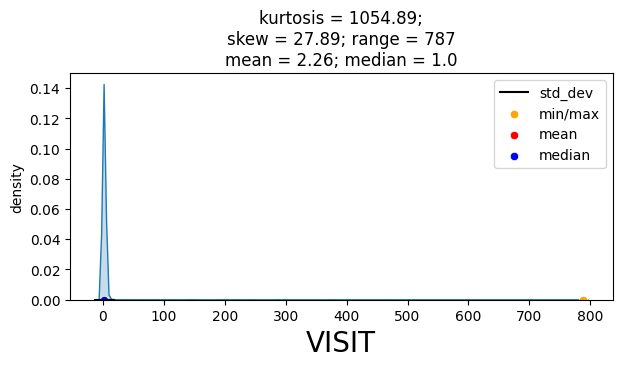

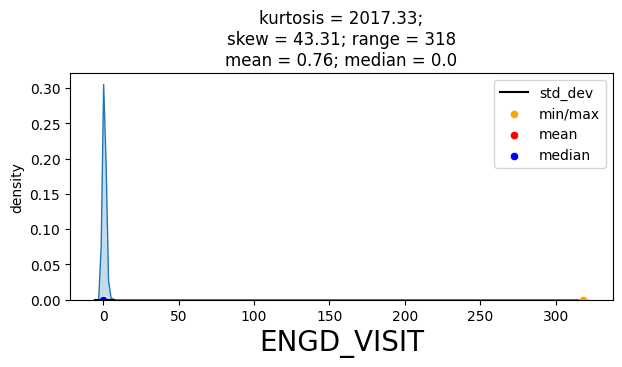

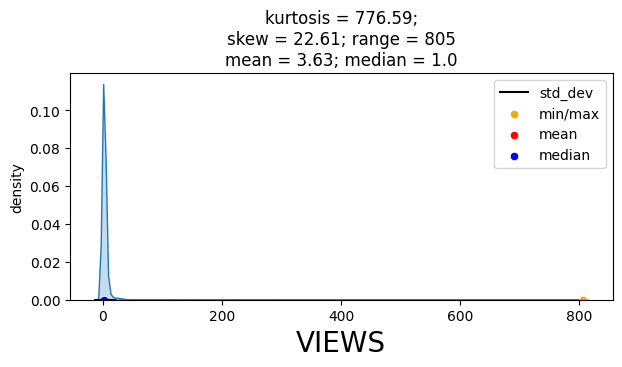

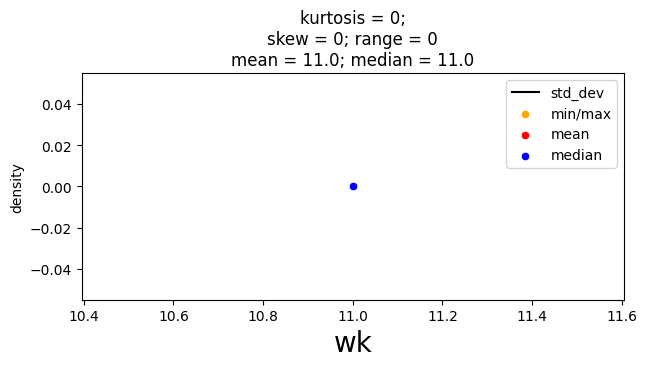

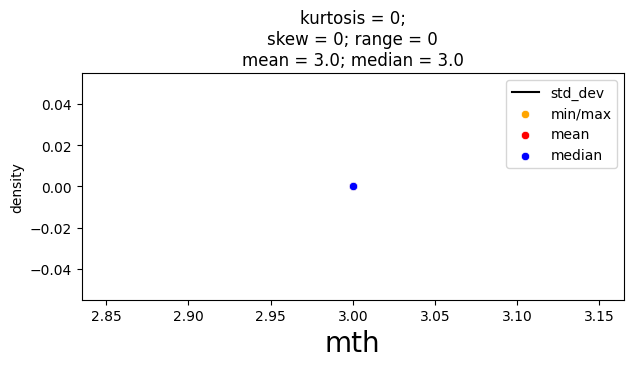

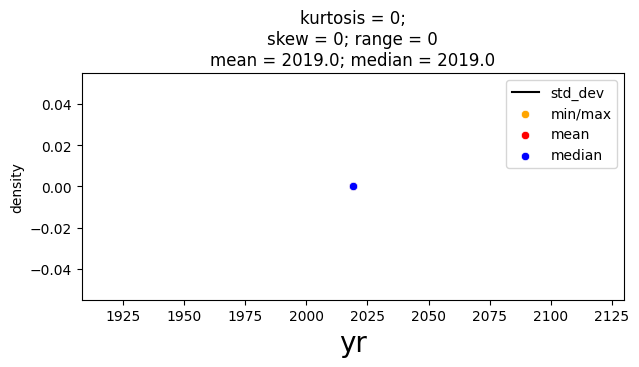

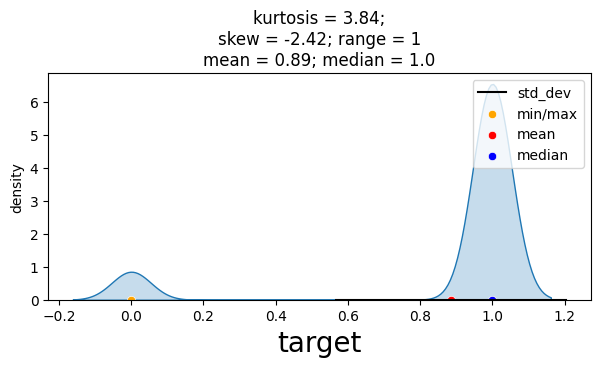

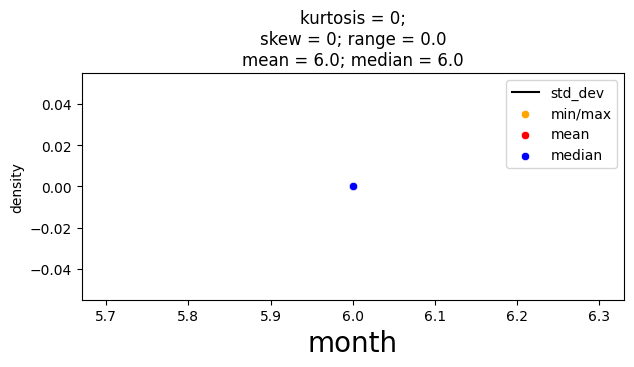

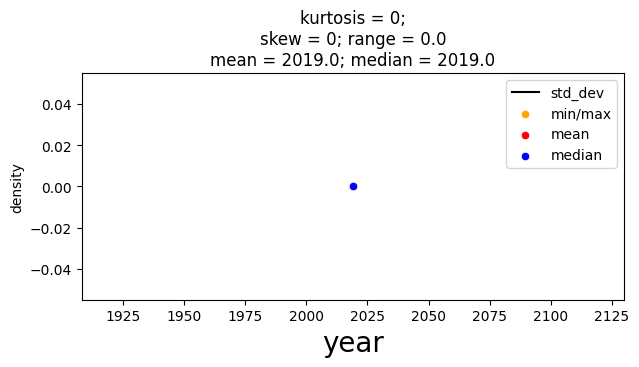

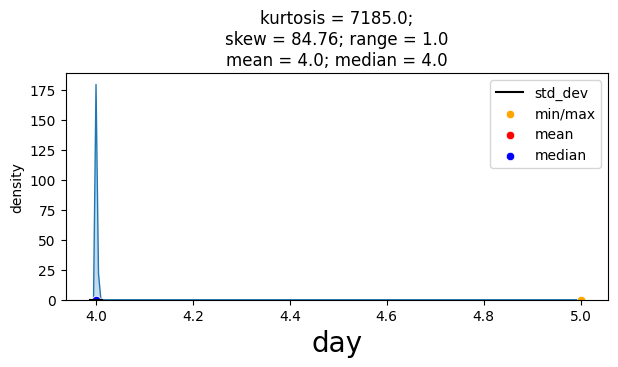

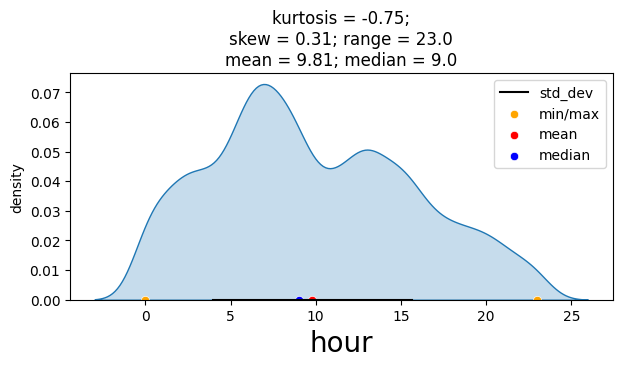

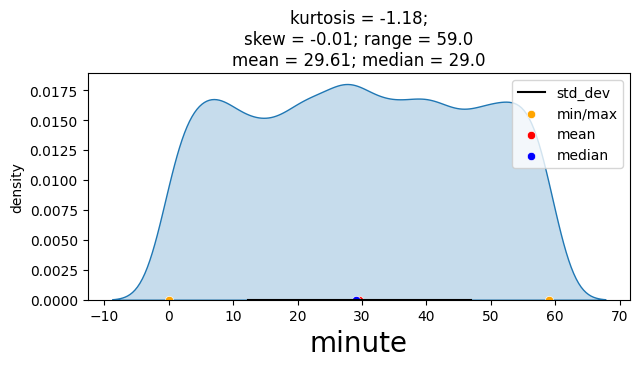

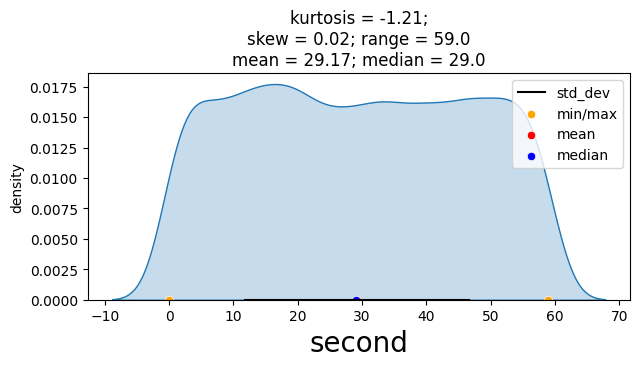

In [21]:
#Check distribution of all numerical features individually
for num in numerical_features:
  UVA_KDE(train_df,[num]);

##Check Outliers

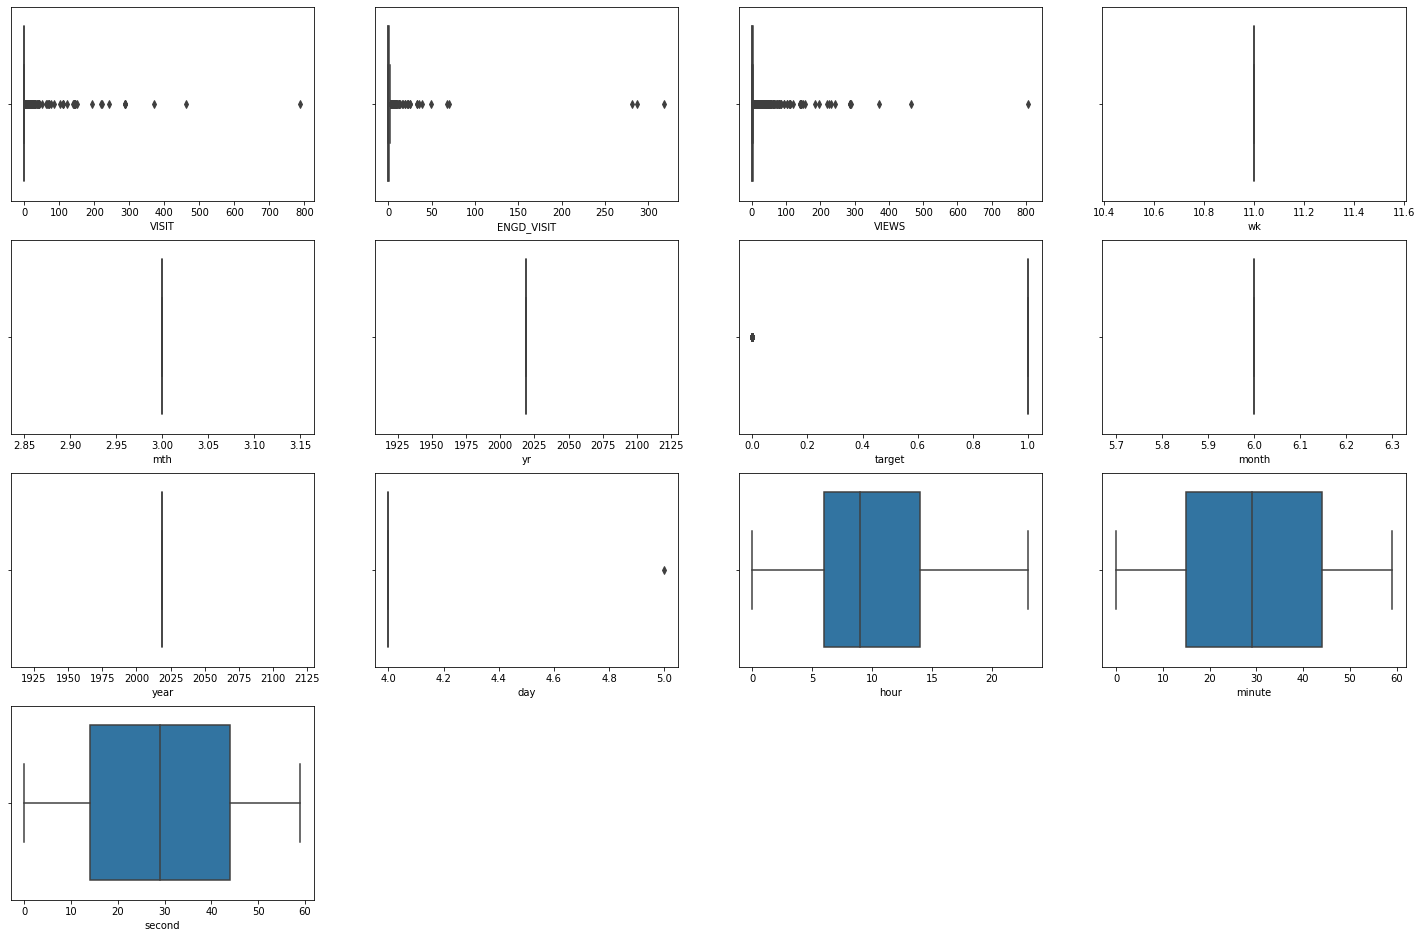

In [22]:
#Plotting the boxplot for all independent numerical variables.
n = 1
plt.figure(figsize=(25,25))
for j in numerical_features:
  plt.subplot(6,4,n)
  n=n+1
  sns.boxplot(x=train_df[j])

##Multicollinearity

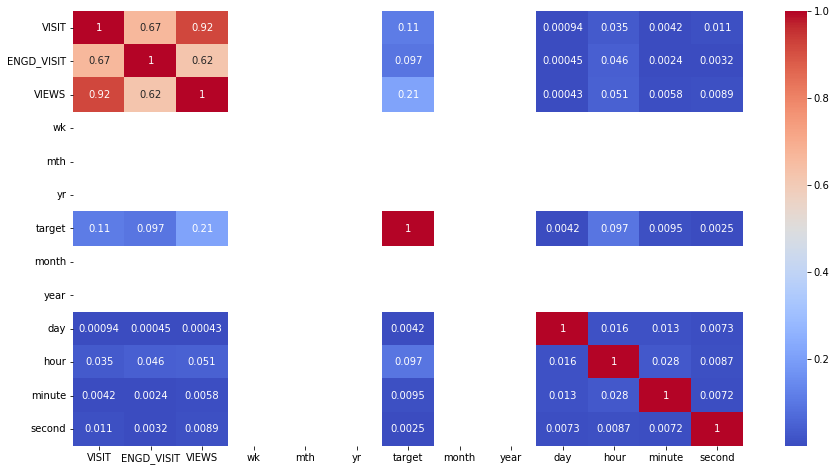

In [23]:
#Check multicollinearity among all independent variables
plt.figure(figsize=(15,8))
correlation = train_df.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm');

#Feature Engineering & Feature Selection

In [24]:
#Fill the missing values sec_lvl_domn column
train_df['sec_lvl_domn'].fillna(train_df['sec_lvl_domn'].mode()[0], inplace=True)

In [25]:
#Fill the missing values sec_lvl_domn column
test_df['sec_lvl_domn'].fillna(test_df['sec_lvl_domn'].mode()[0], inplace=True)

In [26]:
#Create new column by combining ENGD_VISIT & VIEWS
train_df['mean_view_visit_engd'] = train_df.ENGD_VISIT + train_df.VIEWS

In [27]:
#Create new column by combining ENGD_VISIT & VIEWS
test_df['mean_view_visit_engd'] = test_df.ENGD_VISIT + test_df.VIEWS

In [28]:
cols = ['intgrtd_mngmt_name','intgrtd_operating_team_name','st','operating_sys','user_agent','sec_lvl_domn','page_url']

In [29]:
#Check the maximum counts of categorical variables.
for var in cols :
  print(f'The column \033[1m\033[4m{var}\033[0m has unique values :\n{train_df[var].value_counts()}\n', '-'*50)

The column intgrtd_mngmt_name has unique values :
United States           2053
India-South Asia         605
Japan                    565
DACH                     451
CEE                      388
Middle East & Africa     331
UKI                      303
ASEAN                    284
Canada                   266
SPGI                     250
SSA                      240
France                   236
Greater China            213
Brazil                   181
Nordic                   172
Italy                    153
Australia/NZ             142
BeNeLux                  141
Mexico                   117
Korea                    116
Name: intgrtd_mngmt_name, dtype: int64
 --------------------------------------------------
The column intgrtd_operating_team_name has unique values :
North America           2319
Europe                  2094
Asia Pacific            1147
Japan                    565
Latin America            538
Middle East & Africa     331
Greater China Group      213
Name: intgrtd_ope

In [30]:
#Filter the useful data from given categorical columns
train_df['page_url']= train_df['page_url'].apply(lambda x: 1 if x in train_df['page_url'].value_counts()[:5].keys()  else 0)
train_df['intgrtd_mngmt_name']= train_df['intgrtd_mngmt_name'].apply(lambda x: 1 if x in train_df['intgrtd_mngmt_name'].value_counts()[:5].keys()  else 0)
train_df['intgrtd_operating_team_name']= train_df['intgrtd_operating_team_name'].apply(lambda x: 1 if x in train_df['intgrtd_operating_team_name'].value_counts()[:5].keys()  else 0)
train_df['st']= train_df['st'].apply(lambda x: 1 if x in train_df['st'].value_counts()[:5].keys()  else 0)
train_df['operating_sys']= train_df['operating_sys'].apply(lambda x: 1 if x in train_df['operating_sys'].value_counts()[:5].keys()  else 0)
train_df['user_agent']= train_df['user_agent'].apply(lambda x: 1 if x in train_df['user_agent'].value_counts()[:5].keys()  else 0)
train_df['sec_lvl_domn']= train_df['sec_lvl_domn'].apply(lambda x: 1 if x in train_df['sec_lvl_domn'].value_counts()[:5].keys()  else 0)

In [31]:
#Filter the useful data from given categorical columns
test_df['page_url']= test_df['page_url'].apply(lambda x: 1 if x in test_df['page_url'].value_counts()[:5].keys()  else 0)
test_df['intgrtd_mngmt_name']= test_df['intgrtd_mngmt_name'].apply(lambda x: 1 if x in test_df['intgrtd_mngmt_name'].value_counts()[:5].keys()  else 0)
test_df['intgrtd_operating_team_name']= test_df['intgrtd_operating_team_name'].apply(lambda x: 1 if x in test_df['intgrtd_operating_team_name'].value_counts()[:5].keys()  else 0)
test_df['st']= test_df['st'].apply(lambda x: 1 if x in test_df['st'].value_counts()[:5].keys()  else 0)
test_df['operating_sys']= test_df['operating_sys'].apply(lambda x: 1 if x in test_df['operating_sys'].value_counts()[:5].keys()  else 0)
test_df['user_agent']= test_df['user_agent'].apply(lambda x: 1 if x in test_df['user_agent'].value_counts()[:5].keys()  else 0)
test_df['sec_lvl_domn']= test_df['sec_lvl_domn'].apply(lambda x: 1 if x in test_df['sec_lvl_domn'].value_counts()[:5].keys()  else 0)

In [32]:
#Remove the non-required columns.
train_df = train_df.drop(train_df.select_dtypes(include=['object']), axis = 1)

In [33]:
#Remove the non-required columns.
test_df = test_df.drop(test_df.select_dtypes(include=['object']), axis = 1)

In [34]:
#Drop original date flown column
train_df.drop(['wk','mth','yr','Date','month','year','day','VISIT','ENGD_VISIT','VIEWS'], axis=1 , inplace= True)

In [35]:
#Drop original date flown column
test_df.drop(['wk','mth','yr','Date','month','year','day','VISIT','ENGD_VISIT','VIEWS'], axis=1 , inplace= True)

In [36]:
#Fill NAN values using statistical method.
train_df['hour'].fillna(train_df['hour'].mean(), inplace=True)
train_df['minute'].fillna(train_df['minute'].mean(), inplace=True)
train_df['second'].fillna(train_df['hour'].mean(), inplace=True)

In [37]:
#Fill NAN values using statistical method.
test_df['hour'].fillna(test_df['hour'].mean(), inplace=True)
test_df['minute'].fillna(test_df['minute'].mean(), inplace=True)
test_df['second'].fillna(test_df['hour'].mean(), inplace=True)

In [38]:
#Check dataframe last time before training the model
train_df

,intgrtd_mngmt_name,intgrtd_operating_team_name,st,sec_lvl_domn,operating_sys,user_agent,page_url,target,hour,minute,second,mean_view_visit_engd
0,0,1,0,0,1,0,0,1,2.0,28.0,14.0,1
1,1,1,0,0,1,0,0,1,7.0,17.0,42.0,1
2,0,1,0,1,1,0,0,1,9.0,33.0,1.0,1
3,0,0,0,1,1,1,0,1,6.0,42.0,19.0,2
4,1,1,0,0,1,0,0,1,6.0,34.0,28.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
7202,1,1,0,0,1,1,0,0,15.0,34.0,10.0,1
7203,1,1,0,1,1,1,0,0,23.0,55.0,15.0,88
7204,1,1,1,0,1,1,0,0,20.0,50.0,54.0,32
7205,1,1,1,1,1,0,0,1,10.0,29.0,43.0,287


#Model Building

In [39]:
#Divide the independent and dependent variables
X_train = train_df.drop(['target'],axis=1)
Y_train = train_df['target']

In [40]:
#Oversampling the target variable, as we have seen class imbalance in it
from imblearn.over_sampling import RandomOverSampler

oversample = RandomOverSampler(sampling_strategy= 'minority')
x_over,y_over = oversample.fit_resample(X_train,Y_train)

In [41]:
#Scaling the train dataset
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_over)
x_train = pd.DataFrame(x_train, columns=x_over.columns)
display(x_train.describe())

,intgrtd_mngmt_name,intgrtd_operating_team_name,st,sec_lvl_domn,operating_sys,user_agent,page_url,hour,minute,second,mean_view_visit_engd
count,12758.000000,12758.000000,12758.000000,12758.000000,12758.000000,12758.000000,12758.000000,12758.000000,12758.000000,12758.000000,12758.000000
mean,0.567879,0.922637,0.166170,0.333281,0.935570,0.516774,0.032215,0.456840,0.496954,0.492454,0.007463
std,0.495390,0.267177,0.372248,0.471405,0.245527,0.499738,0.176578,0.260468,0.290877,0.295090,0.035773
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.260870,0.254237,0.237288,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.434783,0.491525,0.491525,0.000890
75%,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.652174,0.728814,0.745763,0.002671
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [42]:
#Imports Liberaries of classification models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
import time
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import plot_confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
import time
# Importing  metrics for evaluation of our model performance
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [43]:
x_train

,intgrtd_mngmt_name,intgrtd_operating_team_name,st,sec_lvl_domn,operating_sys,user_agent,page_url,hour,minute,second,mean_view_visit_engd
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.086957,0.474576,0.237288,0.000000
1,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.304348,0.288136,0.711864,0.000000
2,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.391304,0.559322,0.016949,0.000000
3,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.260870,0.711864,0.322034,0.000890
4,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.260870,0.576271,0.474576,0.000890
...,...,...,...,...,...,...,...,...,...,...,...
12753,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.739130,0.050847,0.711864,0.000000
12754,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.869565,0.576271,0.949153,0.010686
12755,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.173913,0.762712,0.711864,0.000000
12756,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.913043,0.525424,0.406780,0.011576


In [44]:
#Declare the models
lr_model=LogisticRegression(C=10)
dt_model=DecisionTreeClassifier()
rf_model=RandomForestClassifier(max_depth= 60, min_samples_leaf = 1, min_samples_split= 5)
gbc_model=GradientBoostingClassifier()
xgb_model=XGBClassifier()
svc_model=SVC()
Gnb_model=GaussianNB()

#Create a list of models
models=[lr_model,svc_model,Gnb_model,dt_model,rf_model,gbc_model,xgb_model]

#Creating dictionay for storing the confustion matix
dct_train={}
dct_test={}                            #Create emplty dictionaries & list
lst_imp=[]
# Fuction for calculation the eveluation matrix
def score_model(x_train,y_over):
    df_columns=[]
    df=pd.DataFrame(columns=df_columns)
    i=0
    #Read model one by one
    for model in models:
        start = time.time()
        model.fit(x_train,y_over)           #fit the model on train data
        end= time.time()
        y_pred_train=model.predict(x_train)
        
        #Compute metrics
        train_accuracy=accuracy_score(y_over,y_pred_train)
        p_score_train=precision_score(y_over,y_pred_train)
        r_score_train=recall_score(y_over,y_pred_train)
        train_auc = roc_auc_score(y_over,y_pred_train)
        fp, tp, th = roc_curve(y_over, y_pred_train)

        #Insert in dataframe
        df.loc[i,"Model_Name"]=model.__class__.__name__
        df.loc[i,"Train_Accuracy"]=round(train_accuracy*100,2)
        df.loc[i,"Precision_Train"]=round(p_score_train*100,2)
        df.loc[i,"Recall_Train"]=round(r_score_train*100,2)
        df.loc[i,"ROC_AUC_Train"]=round(train_auc*100,2)
        df.loc[i,'AUC'] = auc(fp, tp)
        df.loc[i,'Model_training_time ']= end-start
        #Inserted in dictionary
        dct_train[model.__class__.__name__]=confusion_matrix(y_over,y_pred_train)

        i+=1
    # Return the data frame and dictionary
    return df,dct_train

In [45]:
# Get performance matrix dataframe for different classifiers.
final_result_df,dct_train=score_model(x_train,y_over)

In [46]:
#  Get performance on different models
final_result_df

,Model_Name,Train_Accuracy,Precision_Train,Recall_Train,ROC_AUC_Train,AUC,Model_training_time
0,LogisticRegression,64.04,61.33,75.98,64.04,0.640383,0.078738
1,SVC,63.51,61.66,71.44,63.51,0.635131,7.422208
2,GaussianNB,60.19,56.04,94.59,60.19,0.601897,0.003326
3,DecisionTreeClassifier,99.99,100.00,99.98,99.99,0.999922,0.029159
4,RandomForestClassifier,99.99,100.00,99.98,99.99,0.999922,0.838980
5,GradientBoostingClassifier,70.82,66.75,82.98,70.82,0.708183,0.966823
6,XGBClassifier,70.03,65.64,84.07,70.03,0.700345,0.554581


In [47]:
#Imports Liberaries of classification models
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score,GridSearchCV, KFold
# Importing  metrics for evaluation of our model performance
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import roc_auc_score

In [48]:
#Set parameters and initiate model
gbc = GradientBoostingClassifier()
parameters = {
    "n_estimators":[50,250,500],
    "max_depth":[11,13,15],
    "learning_rate":[0.1,0.25,0.3]
}

In [49]:
#Fit the model on train dataset using cross-validation
cv = GridSearchCV(gbc,parameters,cv=10,n_jobs=-1)
cv.fit(x_train,y_over.values.ravel())

GridSearchCV(cv=10, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.25, 0.3],
                         'max_depth': [11, 13, 15],
                         'n_estimators': [50, 250, 500]})

In [50]:
# Get best estimator
gb_optimal_model = cv.best_estimator_

In [51]:
#Fit optimized model on train dataset
gb_optimal_model.fit(x_train,y_over)

GradientBoostingClassifier(learning_rate=0.3, max_depth=13, n_estimators=500)

In [52]:
#Predict and check train dataset
x_train_pred = gb_optimal_model.predict(x_train)

In [53]:
#Check AUC score for train dataset
print('ROCAUC score:', roc_auc_score(y_over, x_train_pred))
print('Accuracy score:', accuracy_score(y_over, x_train_pred))

ROCAUC score: 0.9999216178084339
Accuracy score: 0.9999216178084339


In [54]:
#Scaling the test dataset
test_df = scaler.transform(test_df)
test_df = pd.DataFrame(test_df, columns=x_over.columns)
display(test_df.describe())

,intgrtd_mngmt_name,intgrtd_operating_team_name,st,sec_lvl_domn,operating_sys,user_agent,page_url,hour,minute,second,mean_view_visit_engd
count,6885.000000,6885.000000,6885.000000,6885.000000,6885.000000,6885.000000,6885.000000,6885.000000,6885.000000,6885.000000,6885.000000
mean,0.564125,0.924764,0.168192,0.328976,0.949455,0.520552,0.033696,0.422695,0.501461,0.493669,0.002182
std,0.495907,0.263791,0.374064,0.469875,0.219082,0.499614,0.180460,0.253041,0.293326,0.295603,0.016823
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.217391,0.254237,0.237288,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.391304,0.491525,0.491525,0.000890
75%,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.608696,0.745763,0.745763,0.001781
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
#Predict on test dataset and save csv file
submission = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Almabetter/Project/sample_submission.csv')
final_predictions = gb_optimal_model.predict(test_df)
submission['target'] = final_predictions
submission.to_csv('finalsubmission.csv', index=False)

#Conclusion:



*   Engaged visit and views variable are majorly helped us to identify the bots.
*   We were able to recognise bots by counting how often each system was accessed.

